### **Import libraries**

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### **Read data**

In [2]:
# read datd
data = pd.read_csv("data.csv")
validation_data = pd.read_csv("validation_data.csv")


### **Display data**


In [3]:
data.head()

,label,title,text,subject,date
0,1,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,1,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,1,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
validation_data.head()

,label,title,text,subject,date
0,2,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,2,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,2,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,2,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,2,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"


### **Preprocessing data**

In [5]:
# extract x and y
X = data['text']
y = data['label']

In [6]:
# convert to lower cases
data['text'] = data['text'].str.lower()

In [7]:
# remove all special character
data['text'] = data['text'].str.replace(r'[^\w\s]', '', regex=True)

In [8]:
# convert text to numeric format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_vectorized = vectorizer.fit_transform(X)

### **Splitting Data**

In [9]:
# splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

### **Building a classifier**

In [10]:
# buid the model
model = RandomForestClassifier(n_estimators=100, random_state=42)


### ***Naive bayes***

In [11]:
from sklearn.naive_bayes import MultinomialNB
# train the model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

# prediction on test data
nb_y_pred = nb_model.predict(X_test)

# measure accuracy
nb_accuracy = accuracy_score(y_test, nb_y_pred)
print(f"Accuracy: {nb_accuracy}")

Accuracy: 0.9170108899737138


# *LogisticRegression*

In [12]:
from sklearn.linear_model import LogisticRegression
# train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# prediction on test data
lr_y_pred = lr_model.predict(X_test)

# measure accuracy
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_accuracy}")

Accuracy: 0.9858555513831518


# ***Random Forest***

### **Train the model**

In [13]:
# train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### **Prediction and accuracy**

In [14]:
# prediction on test data
y_pred = model.predict(X_test)

# measure accuracy
rm_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {rm_accuracy}")

Accuracy: 0.9966203529853549


### **Account Score**

In [15]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(classification_rep)

Accuracy: 0.9966203529853549
Precision: 0.99575
Recall: 0.9974956173303281
F1 Score: 0.9966220442887527
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3996
           1       1.00      1.00      1.00      3993

    accuracy                           1.00      7989
   macro avg       1.00      1.00      1.00      7989
weighted avg       1.00      1.00      1.00      7989



### **Process Validation data**

In [16]:
# process new data
validation_texts = validation_data['text']
validation_vectorized = vectorizer.transform(validation_texts)

### **Evaluation predictions**

In [17]:
# evaluation predictions for new data
validation_predictions = model.predict(validation_vectorized)

### **Replace the values ​​2 in label from validation data with the expected values**

In [18]:
# replace the values ​​2 with the expected values 0 and 1
validation_data['label'] = validation_predictions

### **Show the new data**

In [19]:
validation_data.head()

,label,title,text,subject,date
0,1,UK's May 'receiving regular updates' on London...,LONDON (Reuters) - British Prime Minister Ther...,worldnews,"September 15, 2017"
1,1,UK transport police leading investigation of L...,LONDON (Reuters) - British counter-terrorism p...,worldnews,"September 15, 2017"
2,1,Pacific nations crack down on North Korean shi...,WELLINGTON (Reuters) - South Pacific island na...,worldnews,"September 15, 2017"
3,1,Three suspected al Qaeda militants killed in Y...,"ADEN, Yemen (Reuters) - Three suspected al Qae...",worldnews,"September 15, 2017"
4,1,Chinese academics prod Beijing to consider Nor...,BEIJING (Reuters) - Chinese academics are publ...,worldnews,"September 15, 2017"


### **Save data to file**

In [20]:
# save the new file
validation_data.to_csv("validation_data_predicted.csv", index=False)

# **comparing the accuracy of three machine learning models:** *Naive Bayes, Logistic Regression, and Random Forest.*

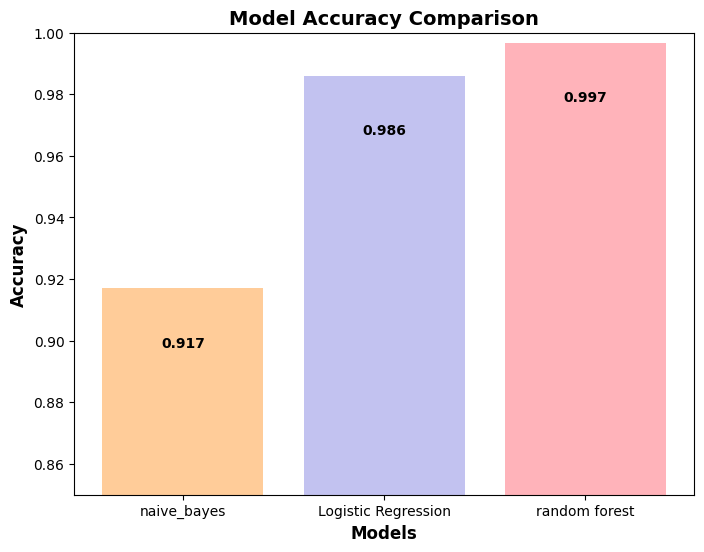

In [21]:
import matplotlib.pyplot as plt
# Adjust the figure size
plt.figure(figsize=(8, 6))

accuracies = [nb_accuracy, lr_accuracy, rm_accuracy]
models=['naive_bayes', 'Logistic Regression', 'random forest']

# Create a bar plot
plt.bar(models, accuracies, color=['#ffcc99', '#c2c2f0', '#ffb3ba'])

# Add labels and title
plt.xlabel('Models', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')


# Add accuracy values on top of each bar with higher precision
for i, accuracy in enumerate(accuracies):
    plt.text(
        i,  # X position: center of the bar
        accuracy - 0.02,  # Y position: slightly above the bar
        f'{accuracy:.3f}',  # Display accuracy with 4 decimal places
        ha='center',  # Horizontal alignment: center
        va='bottom',  # Vertical alignment: bottom
        fontsize=10,  # Font size for the text
        fontweight='bold'  # Bold text
    )

# Set y-axis limits
plt.ylim(0.85, 1)

# Show the plot
plt.show()
